# GEE API Python
We are connecting the GEE with Jupyter Notebook, in order to retrieve the assets from GEE repository.

In [ ]:
import ee
# Authenticate and initialize the Earth Engine API
ee.Authenticate()
ee.Initialize()


Enter verification code:  4/1AfJohXlOZa-LPB_ha8GxPiZ4ZJ2hjNQihZOLgcDgsjU65GElsgzKyuFIuUo



Successfully saved authorization token.


In [ ]:
import pandas as pd
sampled_points = ee.FeatureCollection('projects/ee-geoinfproj/assets/Geoinf/Table_Merged_Points_Stratified_World')
# Convert the Feature Collection to a Pandas DataFrame
sampled_points_ft = sampled_points.getInfo()['features']
sampled_points_df = pd.json_normalize(sampled_points_ft)
sampled_points_df
sampled_points_df.columns = sampled_points_df.columns.str.replace('properties.', '')
sampled_points_df

,type,id,geometry.type,geometry.coordinates,Burn,HumanImpactIndexMean,LandCover,NDMI,NDVI,aspect,precipitation,slope,soil_moist,temp_max,temp_min,water_deficit,wind_speed
0,Feature,000000000000000000c8,Point,"[12.351834772874579, 58.16591429887882]",0,1734.900024,1,0.346820,0.584347,333.769409,70.00,0.050487,744.000000,108.000000,39.0,0.018692,327.291667
1,Feature,000000000000000000c9,Point,"[12.351834772874579, 57.71675796796731]",0,1422.199951,1,0.363281,0.558778,250.894196,81.50,0.116224,713.000000,106.250000,39.0,0.017699,330.750000
2,Feature,000000000000000000ca,Point,"[11.902678441963085, 59.064231419802866]",0,775.700012,1,0.353504,0.545786,104.439148,74.50,0.014530,702.000000,99.300003,32.5,0.008929,294.250000
3,Feature,00000000000000000191,Point,"[146.6499701163047, -42.8945544568774]",0,237.850006,1,0.456449,0.645234,78.933922,113.25,0.094378,750.912476,133.500000,47.0,0.119565,611.833333
4,Feature,00000000000000000258,Point,"[-123.2937740223911, 55.47096739520773]",0,164.250000,1,0.380986,0.327275,242.984055,57.00,0.865332,458.500000,70.000000,-34.0,0.009709,229.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,Feature,00000000000000000345,Point,"[155.18396715822948, -6.063628303709416]",0,480.950012,17,0.417088,0.718136,144.472763,334.00,0.145795,305.000000,288.000000,220.0,0.000000,234.500000
1247,Feature,0000000000000000034c,Point,"[150.69239047181134, -5.6144719727979195]",0,699.900024,17,0.456529,0.775667,310.785583,403.25,0.514406,177.000000,297.000000,221.0,0.000000,250.750000
1248,Feature,00000000000000000350,Point,"[152.93817658546988, -4.266998520962376]",0,626.650024,17,0.488863,0.788514,22.796814,236.00,0.808545,317.000000,274.000000,202.0,0.000000,282.799988
1249,Feature,0000000000000000047d,Point,"[142.6075497607981, 48.28444826421958]",0,878.800000,17,0.444158,0.458248,110.379234,67.00,0.278305,627.000000,66.666667,-4.5,0.000000,399.166667


In [ ]:

# Count the number of points with value 1 (Burn)
burn_count = sampled_points_df['Burn'].value_counts().get(1, 0)

# Count the number of points with value 0 (Unburn)
unburn_count = sampled_points_df['Burn'].value_counts().get(0, 0)

print(f'Number of Burn points: {burn_count}')
print(f'Number of Unburn points: {unburn_count}')


Number of Burn points: 601
Number of Unburn points: 650


# Random Forest Model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Selecting all the properties columns as predictor variables
predictor_columns = ['HumanImpactIndexMean','LandCover','NDMI','NDVI','aspect',
                     'precipitation','slope','soil_moist','temp_max',
                     'temp_min','water_deficit','wind_speed']

X = sampled_points_df[predictor_columns]
y = sampled_points_df['Burn']  #'sum' is the target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the Model
y_pred = rf_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Interpreting the Results
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

Accuracy: 0.7370517928286853
                      importance
wind_speed              0.104316
precipitation           0.095617
NDMI                    0.087743
soil_moist              0.087285
temp_max                0.085794
NDVI                    0.085042
slope                   0.083885
water_deficit           0.077022
HumanImpactIndexMean    0.076335
temp_min                0.075240
LandCover               0.074702
aspect                  0.067018


In [ ]:
from sklearn.utils import shuffle
# Shuffle the combined DataFrame
combined_data_shuffled = shuffle(sampled_points_df).reset_index(drop=True)
column_mapping = {
    'aspect': 'Aspect',
    'precipitation': 'Precipitation',
    'slope': 'Slope',
    'soil_moist': 'SoilMoist',
    'temp_max': 'TempMax',
    'temp_min': 'TempMin',
    'water_deficit': 'WaterDeficit',
    'wind_speed': 'WindSpeed',
    'HumanImpactIndexMean': 'HumanImpactIndexMean',
    'LandCover': 'LandCover',
    'NDMI': 'NDMI',
    'NDVI': 'NDVI'
    # Add more mappings as needed
}

# Rename columns in 'burned_points_df' using the mapping
combined_data_shuffled =combined_data_shuffled.rename(columns=column_mapping)
combined_data_shuffled

,type,id,geometry.type,geometry.coordinates,Burn,HumanImpactIndexMean,LandCover,NDMI,NDVI,Aspect,Precipitation,Slope,SoilMoist,TempMax,TempMin,WaterDeficit,WindSpeed
0,Feature,000000000000000002d7,Point,"[-110.26820029404824, 58.16591429887882]",1,0.000000,8,0.368235,0.089239,330.524750,31.000000,0.118607,294.000000,53.500000,-52.00,0.000000,286.000000
1,Feature,00000000000000000077,Point,"[11.004361321039037, 7.411101755544959]",1,613.750000,9,0.162282,0.492930,11.527658,91.000000,0.672008,1941.500000,315.000000,203.00,392.000000,167.000000
2,Feature,0000000000000000022e,Point,"[143.05671055081064, -19.08919757295124]",1,73.199997,9,-0.000645,0.368503,262.771027,17.500000,0.194344,218.857143,332.000000,187.00,1138.500000,258.000000
3,Feature,000000000000000001e2,Point,"[142.6075497607981, -21.784144476622327]",0,231.300003,10,-0.074817,0.189678,239.608231,12.700000,0.021484,17.350000,340.500000,190.50,1450.500000,262.750000
4,Feature,000000000000000003a8,Point,"[-70.74232723720914, -50.97939070878961]",0,347.850006,10,-0.129902,0.193306,149.459763,12.000000,0.121991,25.000000,137.000000,19.00,656.000000,700.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,Feature,00000000000000000186,Point,"[37.95382143954778, 48.28444826421958]",1,2248.550049,12,0.199097,0.517360,238.573425,42.000000,0.038217,256.500000,143.000000,50.25,15.750000,317.000000
1247,Feature,0000000000000000045f,Point,"[74.78474759271577, 21.334988145710827]",0,2048.500000,12,0.159451,0.300282,219.057709,8.333333,0.223955,216.166667,336.000000,222.50,930.750000,180.250000
1248,Feature,00000000000000000451,Point,"[55.920128185220285, 37.05550431862374]",0,853.700000,10,-0.079585,0.136276,134.798401,14.000000,0.241665,66.500000,197.833333,56.50,801.500000,266.000000
1249,Feature,00000000000000000233,Point,"[147.54828723722875, -24.029935049381915]",1,187.899994,10,-0.106448,0.275602,61.356915,33.000000,0.120930,49.500000,305.500000,152.50,953.000000,246.000000


# Second attempt
Adding extra points selected manually.

In [ ]:
unburned_points = ee.FeatureCollection('projects/ee-geoinfproj/assets/Geoinf/UnB_points_manually_sum0')
burned_points = ee.FeatureCollection('projects/ee-geoinfproj/assets/Geoinf/B_points_sum1')

In [ ]:
# Convert the Feature Collection to a Pandas DataFrame
unburned_points_ft = unburned_points.getInfo()['features']
unburned_points_df = pd.json_normalize(unburned_points_ft)
unburned_points_df

,type,id,geometry.type,geometry.coordinates,properties.Aspect,properties.B2,properties.B3,properties.B4,properties.B5,properties.B6,...,properties.NDMI,properties.NDVI,properties.Precipitation,properties.Slope,properties.SoilMoist,properties.TempMax,properties.TempMin,properties.WaterDeficit,properties.WindSpeed,properties.sum
0,Feature,00000000000000000000,Point,"[-128.60870142282275, 55.61789031581772]",49.733185,0.104098,0.073589,0.049306,0.218880,0.059610,...,0.571903,0.632302,66.000000,8.545887,643.000000,100.500000,12.333333,0.00,177.000000,0
1,Feature,00000000000000000001,Point,"[-116.04027919358023, 52.926176260410394]",140.327637,0.118835,0.104039,0.102120,0.250239,0.131230,...,0.311976,0.420365,34.500000,2.408563,265.250000,96.000000,-41.333333,0.00,250.000000,0
2,Feature,00000000000000000002,Point,"[-120.83036594092019, 54.96732976762524]",119.857765,0.143936,0.107948,0.097996,0.258907,0.085780,...,0.502274,0.450854,49.000000,1.862342,476.142857,82.333333,-29.000000,0.00,280.333333,0
3,Feature,00000000000000000003,Point,"[-126.8508747374428, 51.581217741568985]",105.209137,0.811475,0.760703,0.819800,0.776675,0.129716,...,0.713774,-0.027013,145.000000,23.361071,566.000000,63.000000,-11.000000,0.00,284.500000,0
4,Feature,00000000000000000004,Point,"[74.39267667349048, 59.856680563516]",270.000000,0.151283,0.114450,0.094638,0.230913,0.081419,...,0.478640,0.418596,45.500000,3.688864,920.500000,53.750000,-26.750000,0.00,287.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Feature,00000000000000000152,Point,"[174.7494948239119, -39.296487980447715]",195.690628,0.087141,0.055361,0.033125,0.101027,0.030988,...,0.530533,0.506159,155.000000,21.142973,918.000000,158.000000,78.500000,0.00,403.000000,0
339,Feature,00000000000000000153,Point,"[172.50828820703526, -41.0424534570255]",22.505882,0.115115,0.097328,0.097116,0.260177,0.279924,...,-0.036562,0.456378,267.416667,15.661169,660.000000,116.000000,35.500000,0.00,540.333333,0
340,Feature,00000000000000000154,Point,"[167.9214026947008, -46.99217402432464]",17.781143,0.117768,0.088246,0.062272,0.295192,0.100851,...,0.490705,0.651592,119.000000,28.545984,531.000000,141.500000,55.500000,0.00,829.250000,0
341,Feature,00000000000000000155,Point,"[174.00245716532706, -35.920618509511236]",72.051178,0.113955,0.112036,0.082896,0.495576,0.250865,...,0.327838,0.713395,109.250000,5.997396,1543.000000,185.500000,110.000000,0.03,391.361111,0


In [ ]:
# Convert the Feature Collection to a Pandas DataFrame
burned_points_ft = burned_points.getInfo()['features']
burned_points_df = pd.json_normalize(burned_points_ft)
burned_points_df


,type,id,geometry.type,geometry.coordinates,properties.Aspect,properties.B2,properties.B3,properties.B4,properties.B5,properties.B6,...,properties.NDMI,properties.NDVI,properties.Precipitation,properties.Slope,properties.SoilMoist,properties.TempMax,properties.TempMin,properties.WaterDeficit,properties.WindSpeed,properties.sum
0,Feature,00000000000000000000,Point,"[107.61444210680783, 52.5363081371055]",45.777794,0.134570,0.090853,0.068992,0.192861,0.081001,...,0.408452,0.473049,10.000000,10.518962,42.000000,36.500000,-76.00,0.053191,290.000000,1
1,Feature,00000000000000000334,Point,"[146.26023576603143, -42.8839997646839]",253.664474,0.088320,0.058042,0.037470,0.172443,0.060175,...,0.482630,0.642994,142.000000,12.964540,724.990476,145.000000,61.50,0.000000,630.500000,1
2,Feature,00000000000000000335,Point,"[-92.35961215241153, 52.230342459222264]",320.773834,0.130084,0.090637,0.069279,0.155443,0.062014,...,0.429646,0.383427,48.000000,4.778069,404.000000,59.500000,-40.25,0.000000,349.500000,1
3,Feature,00000000000000000001,Point,"[28.145431152952412, -2.3686343476809695]",289.163818,0.088389,0.064997,0.045173,0.160625,0.080791,...,0.330689,0.561000,97.428571,21.529169,1380.500000,252.000000,140.50,44.500000,172.500000,1
4,Feature,00000000000000000002,Point,"[28.7786547162491, 3.160766895219308]",314.956390,0.098823,0.081697,0.057348,0.333551,0.154660,...,0.366422,0.706582,126.500000,2.623505,724.000000,314.000000,196.00,20.038462,149.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,Feature,000000000000000003b5,Point,"[131.4027295519014, 44.784116364679306]",90.000000,0.123577,0.102174,0.112475,0.349866,0.178543,...,0.324225,0.513456,37.000000,11.599691,223.500000,124.333333,4.00,0.000000,312.500000,1
946,Feature,0000000000000000029a,Point,"[126.65621268095461, -14.889981847102293]",0.000000,0.106655,0.094564,0.088995,0.217751,0.232047,...,-0.031784,0.419746,38.200001,0.000000,519.000000,339.000000,234.00,734.000000,170.199997,1
947,Feature,00000000000000000299,Point,"[-71.98411553497697, 9.418611345311563]",0.000000,0.114947,0.096156,0.061334,0.332762,0.154405,...,0.366111,0.688738,87.000000,0.927410,539.000000,340.000000,242.50,390.000000,330.000000,1
948,Feature,00000000000000000394,Point,"[114.16648466710326, -3.1288754044850644]",0.000000,0.106948,0.095569,0.060337,0.403773,0.173245,...,0.399515,0.739990,206.500000,1.854334,1808.000000,319.000000,236.00,0.000000,128.000000,1


In [ ]:
# Convert the Feature Collection to a Pandas DataFrame
burned_points_ft = burned_points.getInfo()['features']
burned_points_df = pd.json_normalize(burned_points_ft)

# Rename the column to 'properties.sum Burn'
burned_points_df = burned_points_df.rename(columns={'properties.sum': 'Burn'})
burned_points_df.columns = burned_points_df.columns.str.replace('properties.', '')
# Assuming 'B2', 'B3', 'B4', 'B5', 'B6' are the column names you want to remove
columns_to_remove = ['B2', 'B3', 'B4', 'B5', 'B6','B7']

# Remove the specified columns from the DataFrame
burned_points_df = burned_points_df.drop(columns=columns_to_remove)
column_mapping = {
    'aspect': 'Aspect',
    'precipitation': 'Precipitation',
    'slope': 'Slope',
    'soil_moist': 'SoilMoist',
    'temp_max': 'TempMax',
    'temp_min': 'TempMin',
    'water_deficit': 'WaterDeficit',
    'wind_speed': 'WindSpeed',
    'HumanImpactIndexMean': 'HumanImpactIndexMean',
    'LandCover': 'LandCover',
    'NDMI': 'NDMI',
    'NDVI': 'NDVI'
    # Add more mappings as needed
}

# Rename columns in 'burned_points_df' using the mapping
burned_points_df = burned_points_df.rename(columns=column_mapping)
# Sample some random points from the DataFrame
# Here, let's say you want to sample 100 points
sampled_burned_points_df = burned_points_df.sample(n=100, random_state=42)
sampled_burned_points_df


,type,id,geometry.type,geometry.coordinates,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,TempMin,WaterDeficit,WindSpeed,Burn
199,Feature,00000000000000000068,Point,"[25.758425308931248, -9.65711528335722]",108.191025,781.849976,8,0.149713,0.508651,51.666667,2.968297,1124.000000,306.000000,183.0,404.000000,196.0,1
929,Feature,0000000000000000022a,Point,"[49.077704505223394, 40.78858791585072]",244.274918,1079.150024,17,-0.085567,0.199228,28.500000,14.631137,185.000000,151.750000,64.0,210.333333,300.0,1
693,Feature,000000000000000001d6,Point,"[22.542726747834536, -18.898174142922674]",226.586594,251.149994,10,-0.058066,0.370675,20.750000,1.349304,75.500000,312.500000,168.0,1182.500000,247.5,1
798,Feature,0000000000000000039f,Point,"[73.29439562492571, 52.63602255486266]",180.000000,81.849998,10,-0.090534,0.281241,23.500000,0.927410,64.000000,106.666667,5.5,0.000000,368.5,1
874,Feature,0000000000000000032e,Point,"[-64.67784724519852, -31.816845382610243]",90.000000,621.049988,12,0.087504,0.503133,44.500000,10.785799,25.111111,213.500000,77.0,712.500000,435.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,Feature,000000000000000003aa,Point,"[41.54560058349212, 52.06657751393341]",270.000000,1430.949951,12,0.178690,0.514074,42.000000,1.508394,270.000000,124.000000,28.0,0.000000,340.0,1
72,Feature,00000000000000000026,Point,"[33.35350511484032, -18.246266946212046]",313.522736,581.900024,4,0.027638,0.474369,37.500000,1.346592,958.250000,298.000000,176.0,309.000000,150.0,1
542,Feature,00000000000000000138,Point,"[35.54521125092267, -7.929744258172302]",314.724762,1635.849976,10,-0.155082,0.293379,20.500000,3.947792,624.833333,248.000000,139.0,589.000000,270.0,1
44,Feature,00000000000000000337,Point,"[146.82698305082334, -7.1735431469226265]",358.519623,305.649994,2,0.367257,0.712506,285.666667,32.273796,367.000000,237.000000,123.0,0.000000,395.0,1


In [ ]:
unburned_points_df = unburned_points.getInfo()['features']
unburned_points_df = pd.json_normalize(unburned_points_ft)
# Rename the column to 'properties.sum Burn'
unburned_points_df = unburned_points_df.rename(columns={'properties.sum': 'Burn'})
unburned_points_df.columns = unburned_points_df.columns.str.replace('properties.', '')
columns_to_remove = ['B2', 'B3', 'B4', 'B5', 'B6','B7']

# Remove the specified columns from the DataFrame
unburned_points_df = unburned_points_df.drop(columns=columns_to_remove)
column_mapping = {
    'aspect': 'Aspect',
    'precipitation': 'Precipitation',
    'slope': 'Slope',
    'soil_moist': 'SoilMoist',
    'temp_max': 'TempMax',
    'temp_min': 'TempMin',
    'water_deficit': 'WaterDeficit',
    'wind_speed': 'WindSpeed',
    'HumanImpactIndexMean': 'HumanImpactIndexMean',
    'LandCover': 'LandCover',
    'NDMI': 'NDMI',
    'NDVI': 'NDVI'
    # Add more mappings as needed
}

# Rename columns in 'burned_points_df' using the mapping
unburned_points_df = unburned_points_df.rename(columns=column_mapping)
# Sample some random points from the DataFrame
# Here, let's say you want to sample 100 points
sampled_unburned_points_df = unburned_points_df.sample(n=100, random_state=42)


In [ ]:
# Now, you can combine the shuffled burned points with other sampled points if needed
combined_data_shuffled_mixed = shuffle(pd.concat([sampled_unburned_points_df, sampled_burned_points_df, combined_data_shuffled], ignore_index=True)).reset_index(drop=True)
combined_data_shuffled_mixed

,type,id,geometry.type,geometry.coordinates,Aspect,HumanImpactIndexMean,LandCover,NDMI,NDVI,Precipitation,Slope,SoilMoist,TempMax,TempMin,WaterDeficit,WindSpeed,Burn
0,Feature,000000000000000003bb,Point,"[-53.2251812815492, -13.250151893798627]",19.663351,257.350006,2,0.207056,0.602503,111.000000,0.044245,1964.500000,319.000000,190.50,81.000,142.000000,1
1,Feature,000000000000000003c2,Point,"[-63.55580810622099, -8.758575207380499]",329.781403,528.049988,2,-0.009606,0.412537,180.333333,0.034590,2902.987549,311.000000,216.00,0.000,114.000000,1
2,Feature,00000000000000000126,Point,"[21.784144476622327, 43.79287157780145]",141.226242,1092.150024,14,0.203972,0.564867,61.000000,0.140575,658.750000,147.583333,55.50,32.125,288.000000,0
3,Feature,00000000000000000003,Point,"[-126.8508747374428, 51.581217741568985]",105.209137,29.000000,1,0.713774,-0.027013,145.000000,23.361071,566.000000,63.000000,-11.00,0.000,284.500000,0
4,Feature,00000000000000000156,Point,"[-1.1228952863797945, 42.445398125965916]",224.935425,930.049988,12,0.249081,0.563046,51.500000,0.464444,574.000000,178.000000,69.00,235.250,370.600006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Feature,0000000000000000019c,Point,"[144.4041840026462, -27.174038283964496]",268.867523,169.250000,7,-0.187421,0.167404,18.000000,0.045828,6.000000,310.000000,160.00,1273.000,246.500000,0
1447,Feature,00000000000000000076,Point,"[-129.44359229036257, 58.39233407306964]",318.079498,0.000000,8,0.684977,-0.054699,56.000000,20.296705,482.000000,23.000000,-82.00,0.000,230.000000,0
1448,Feature,00000000000000000469,Point,"[63.10664731620844, 28.072350945787488]",8.951115,779.800000,16,-0.085103,0.070216,0.000000,0.138455,0.000000,359.000000,198.25,1687.750,239.250000,0
1449,Feature,000000000000000003df,Point,"[-48.28444826421958, -12.351834772874577]",278.334869,387.600006,9,0.212285,0.611400,82.250000,0.056235,1472.500000,321.000000,205.00,310.250,152.000000,1


Accuracy: 0.7525773195876289
Confusion Matrix:
[[119  32]
 [ 40 100]]


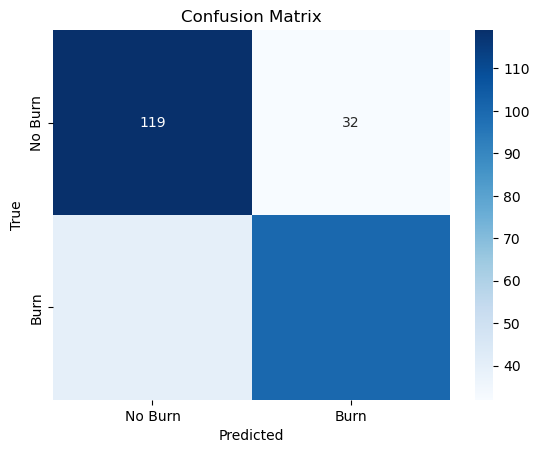

                      importance
WindSpeed               0.100515
NDVI                    0.095257
NDMI                    0.089032
Precipitation           0.087268
HumanImpactIndexMean    0.085429
SoilMoist               0.083466
TempMax                 0.083202
Slope                   0.081115
LandCover               0.079303
WaterDeficit            0.078512
TempMin                 0.073839
Aspect                  0.063061


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting all the properties columns as predictor variables
predictor_columns = ['Aspect','Precipitation','Slope','SoilMoist','TempMax','TempMin','WaterDeficit','WindSpeed',
                     'HumanImpactIndexMean','LandCover','NDMI','NDVI']

X = combined_data_shuffled_mixed[predictor_columns]
y = combined_data_shuffled_mixed['Burn']  #'sum' is the target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Model
rf_model_shuffled_mixed = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_shuffled_mixed.fit(X_train, y_train)

# Evaluating the Model
y_pred = rf_model_shuffled_mixed.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Optional: Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Burn', 'Burn'], yticklabels=['No Burn', 'Burn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Interpreting the Results
feature_importances = pd.DataFrame(rf_model_shuffled_mixed.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)